In [10]:
from bs4 import BeautifulSoup
# import urllib
import requests
import pandas as pd

In [11]:
주소들 = []
기본주소 = 'https://hiseoul.sba.kr/Pages/AccountList.aspx?'
searchStrings = ["반도체", "의류", "자동차"]
pagenos = [1,2,3,4,5,6,7,8,9,10]
sorts = [1,2,3,4]
addresss = ["강남구", "강동구", "강북구", "강서구", "관악구", "광진구", "구로구", "금천구", "노원구", "도봉구", "동대문구", "동작구", "마포구", "서대문구", "서초구", "성동구", "성북구", "송파구", "양천구", "영등포구", "용산구", "은평구", "종로구", "중구", "중랑구",]
export_cds = [
"아프리카",
"아시아",
"유럽",
"북미",
"오세아니아",
"중남미",]
items = ["it001", "it002", "it003"]

In [12]:
for pageno in pagenos:
    주소들.append(f"{기본주소}&pageno={pageno}")

In [13]:
주소들.insert(0,'https://www.naver.com/')
주소들[0]

'https://www.naver.com/'

In [15]:
리스판스 = requests.get(주소들[0])

In [16]:
soup = BeautifulSoup(리스판스.text)

###        기업리스트중 첫번째
###        #list_account > li:nth-child(1) > h3 > a

<!DOCTYPE html>
<html data-dark="false" lang="ko"> <head> <meta charset="utf-8"/> <title>NAVER</title> <meta content="IE=edge" http-equiv="X-UA-Compatible"/> <meta content="width=1190" name="viewport"/> <meta content="NAVER" name="apple-mobile-web-app-title"/> <meta content="index,nofollow" name="robots"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="description"/> <meta content="네이버" property="og:title"/> <meta content="https://www.naver.com/" property="og:url"/> <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" property="og:image"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" property="og:description"/> <meta content="summary" name="twitter:card"/> <meta content="" name="twitter:title"/> <meta content="https://www.naver.com/" name="twitter:url"/> <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" name="twitter:image"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="twitter:
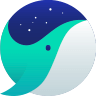
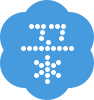

In [8]:
print(soup)

In [33]:
결과 = soup.find_all('a')
print(결과[0])
print(결과[1])
print(len(결과), type(결과))

<a href="#newsstand"><span>뉴스스탠드 바로가기</span></a>
<a href="#themecast"><span>주제별캐스트 바로가기</span></a>
402 <class 'bs4.element.ResultSet'>


In [34]:
for i in range(0, len(결과)):
    try:
        print(결과[i].get_attribute_list('href')[0])
        print(결과[i].getText())
    except:
        print("에러났어요 ㅜ ㅜ")
        

#newsstand
뉴스스탠드 바로가기
#themecast
주제별캐스트 바로가기
#timesquare
타임스퀘어 바로가기
#shopcast
쇼핑캐스트 바로가기
#account
로그인 바로가기
https://whale.naver.com/banner/details/security/?=main&wpid=RydDy7

https://installer-whale.pstatic.net/downloads/banner/RydDy7/WhaleSetup.exe
다운로드
/
네이버
https://help.naver.com/support/welcomePage/guide.help
네이버를 시작페이지로
https://jr.naver.com
쥬니어네이버
https://happybean.naver.com
해피빈
#
한글 입력기
#
자동완성 레이어
#
전체삭제
#

@txt@

#
삭제
https://help.naver.com/support/alias/search/word/word_29.naver
도움말
https://help.naver.com/support/alias/search/word/word_29.naver
도움말
https://help.naver.com/support/service/main.help?serviceNo=605&categoryNo=1991
도움말
#
자동저장 끄기
#



@5@회차 당첨번호

추첨 @13@.지급기한 1년




@6@@7@@8@@9@@10@@11@@12@



#


@14@

@txt@@currency@

@8@(@9@%)



@6@원


#



@txt@

@7@, @message@





@7@
@8@°



@5@



@txt@

@5@



바로가기


#

@txt@

#
추가
#

@txt@

#
추가
#

@query@ @intend@

#
추가
#
자세히보기
https://help.naver.com/support/alias/search/word/word_16.naver
관심사를 반영한 컨텍스트 자동완성도움말
#
컨텍스트 자동완성

In [36]:
결과를담은리스트1 = []
결과를담은리스트2 = []

In [37]:
for i in range(0, len(결과)):
    결과를담은리스트1.append(결과[i].get_attribute_list('href')[0])
    결과를담은리스트2.append(결과[i].getText())

결과를담은리스트1.append( 결과[0].get_attribute_list('href')[0]  )

In [42]:
df = pd.DataFrame(data={"결과1":결과를담은리스트1,"결과2":결과를담은리스트2})

In [47]:
df.to_excel("C:\\Users\\EXC\\Desktop\\네이버크롤링.xlsx", index=False, columns = ["결과1", "결과2"])